# API ET COLLECTE DE DONNES AVEC PYTHON

## INTRODUCTION API


Une API permet à deux logiciels de communiquer entre eux. Tout comme une fonction, vous n'avez pas besoin de savoir comment fonctionne l'API, seulement ses entrées et ses sorties. Un type essentiel d'API est une API REST qui vous permet d'accéder à des ressources via Internet.

### REST API
Les API REST fonctionnent en envoyant des requêtes via des messages HTTP, qui contiennent généralement des fichiers JSON avec des instructions sur les opérations à effectuer par le service ou la ressource. De même, l'API renvoie des réponses via des messages HTTP, souvent sous forme de JSON.

Nous utiliserons l'API NBA pour analyser la performance des Golden State Warriors contre les Toronto Raptors. Nous déterminerons le nombre de points gagnés ou perdus par les Golden State Warriors pour chaque match. Une valeur positive indiquera une victoire par ce nombre de points, tandis qu'une valeur négative indiquera une défaite par ce nombre de points. L'API gérera divers détails comme les points de terminaison et l'authentification.

Il est assez simple d'utiliser l'API NBA pour faire une demande pour une équipe spécifique. Nous n'avons pas besoin d'un JSON, tout ce dont nous avons besoin est un identifiant. Ces informations sont stockées localement dans l'API. Nous importons le module `teams`.

In [1]:
! pip install nba_api

  Using cached nba_api-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
Using cached nba_api-1.5.0-py3-none-any.whl (279 kB)
Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl (100 kB)
   ---------------------------------------- 66.9/66.9 kB 1.2 MB/s eta 0:00:00
Using cached urllib3-2.2.2-py3-none-any.whl (121 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] Le fichier spécifié est introuvable: 'C:\\Python312\\Scripts\\f2py.exe' -> 'C:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def un_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

La méthode <code>get_teams()</code> renvoie une liste de dictionnaires.

In [4]:
nba_teams = teams.get_teams()
nba_teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

La clé du dictionnaire ``id`` possède un identifiant unique pour chaque équipe en tant que valeur. Examinons les trois premiers éléments de la liste :

In [5]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

Pour simplifier les choses, nous pouvons convertir le dictionnaire en table. Nous utilisons d'abord la fonction one dict, pour créer un dictionnaire. Nous utilisons les clés communes à chaque équipe comme clés, la valeur est une liste ; chaque élément de la liste correspond aux valeurs de chaque équipe. Nous convertissons ensuite le dictionnaire en dataframe, chaque ligne contient les informations pour une équipe différente.

In [6]:
dict_nba_team = un_dict(nba_teams)
dict_nba_team
data_nba = pd.DataFrame(dict_nba_team)
data_nba.head(5)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


Nous utiliserons le surnom de l'équipe pour trouver l'identifiant unique, nous pouvons voir la ligne qui contient les **``warriors``** en utilisant la colonne surnom comme suit :

In [7]:
df_warriors=data_nba[data_nba['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


Nous pouvons utiliser la ligne de code suivante pour accéder à la première colonne du DataFrame :

In [8]:
id_warriors = df_warriors[['id']].values[0][0]
id_warriors

1610612744

La fonction « League Game Finder » effectuera un appel API, elle se trouve dans le module <code>stats.endpoints</code>.

In [9]:
from nba_api.stats.endpoints import leaguegamefinder

Le paramètre <code>team_id_nullable</code> est l'identifiant unique des guerriers ou **warriors**. Sous le capot, l'API NBA effectue une requête HTTP.\
Les informations demandées sont fournies et transmises via une réponse HTTP qui est attribuée à l'objet <code>game finder</code>.

In [10]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
gamefinder

Nous pouvons voir le fichier json en exécutant la ligne de code suivante.

In [11]:
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "TeamID": "1610612744", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "DateFrom": null, "DateTo": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeamID": null, "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPTS": null, "GtREB": null, "GtAST": null, "GtSTL": null, "GtBLK": null, "GtOREB": null, "GtDREB": null, "GtDD": null, "GtTD": null, "GtMINUTES": null, "GtTOV": null, "GtPF": null, "GtFGM": null, "GtFGA": null, "GtFG_PCT": null, "GtFTM": null, "GtFTA": null, "GtFT_PCT": null, "GtFG3M": null, "GtFG3A": null, "GtFG3_PCT": null, "LtPTS": null, "LtREB": null, "LtAST": null, "LtSTL": null, "LtBLK": null, "LtOREB": null, "LtDREB": null, "LtDD": null, "L

L'objet de recherche de jeu a une méthode <code>get_data_frames()</code>, qui renvoie un dataframe. Si nous visualisons le dataframe, nous pouvons voir qu'il contient des informations sur tous les matchs joués par les Warriors.

La colonne <code>PLUS_MINUS</code> contient des informations sur le score, si la valeur est négative, les Warriors ont perdu par ce nombre de points, si la valeur est positive, les Warriors ont gagné par ce nombre de points.

La colonne <code>MATCHUP</code> contient l'équipe contre laquelle les Warriors jouaient, GSW signifie Golden State Warriors et TOR signifie Toronto Raptors. <code>vs</code> signifie qu'il s'agissait d'un match à domicile et le symbole <code>@</code> signifie un match à l'extérieur.

In [12]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,1522400070,2024-07-21,GSW @ MIA,L,199,99,...,0.760,13.0,34.0,47.0,26,6,2,15,21,-3.0
1,22024,1610612744,GSW,Golden State Warriors,1522400059,2024-07-19,GSW @ OKC,W,199,90,...,0.810,9.0,28.0,37.0,23,7,3,18,17,9.2
2,22024,1610612744,GSW,Golden State Warriors,1522400045,2024-07-17,GSW @ CLE,W,199,96,...,0.810,9.0,36.0,45.0,23,8,1,18,12,6.8
3,22024,1610612744,GSW,Golden State Warriors,1522400023,2024-07-14,GSW vs. CHI,W,199,92,...,0.769,12.0,28.0,40.0,21,9,6,16,20,6.6
4,22024,1610612744,GSW,Golden State Warriors,1522400015,2024-07-13,GSW vs. PHX,W,199,90,...,0.750,12.0,34.0,46.0,22,11,7,19,20,15.0


Vous pouvez télécharger le dataframe à partir de l'appel API pour Golden State et exécuter le reste comme une vidéo.

In [13]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [14]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


Nous pouvons créer deux dataframes, un pour les matchs où les Warriors ont affronté les Raptors à domicile, et le second pour les matchs à l'extérieur.

In [15]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

Nous pouvons calculer la moyenne de la colonne <code>PLUS_MINUS</code> pour les dataframes <code>games_home</code> et <code>games_away</code> :

In [16]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [17]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

Nous pouvons tracer la colonne <code>PLUS MINUS</code> pour les trames de données <code>games_home</code> et <code> games_away</code>.
Nous voyons que les Warriors ont mieux joué à domicile.

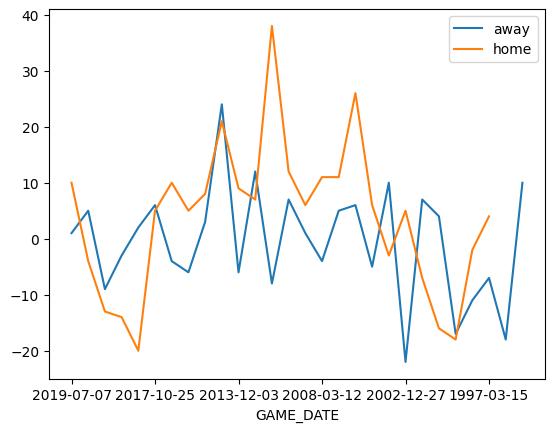

In [18]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

<h1> HTTP and Requests</h1>


Lorsque vous, le **client**, utilisez une page Web, votre navigateur envoie une requête **HTTP** au **serveur** sur lequel la page est hébergée. Le serveur essaie de trouver la **ressource** souhaitée par défaut « <code>index.html</code> ». Si votre requête aboutit, le serveur envoie l'objet au client dans une **réponse HTTP**. Cela inclut des informations telles que le type de la **ressource**, la longueur de la **ressource** et d'autres informations.

<p>
Le protocole <b>HTTP</b> vous permet d'envoyer et de recevoir des informations via le Web, notamment des pages Web, des images et d'autres ressources Web.
</p

L'URL (Uniform Resource Locator) est le moyen le plus populaire de trouver des ressources sur le Web. Nous pouvons diviser l'URL en trois parties.

<ul>
<li><b>Schéma</b> : il s'agit de ce protocole. Il s'agira toujours de <code>http://</code> </li>
<li><b>Adresse Internet ou URL de base </b> : elle sera utilisée pour trouver l'emplacement. Voici quelques exemples :<code>www.google.com</code>, <code>www.microsoft.com</code>, <code>www.ibm.com</code> et <code> www.gitlab.com </code> </li>
<li><b>Route</b> : emplacement sur le serveur Web, par exemple : <code>/images/IDSNlogo.png</code> </li>
</ul>

Vous pouvez également entendre le terme Uniform Resource Identifier (URI), les URL étant en fait un sous-ensemble d'URI. Un autre terme populaire est endpoint, il s'agit de l'URL d'une opération fournie par un serveur Web.

**REQUEST**

Le processus peut être divisé en processus <b>Request</b> and <b>Response </b>. La Request utilisant la méthode get est partiellement illustrée ci-dessous. Dans la ligne de départ, nous avons la méthode <code>GET</code>, il s'agit d'une méthode <code>HTTP</code>. Également l'emplacement de la ressource <code>/index.html</code> et la version <code>HTTP</code>. L'en-tête de la requête transmet des informations supplémentaires avec une requête <code>HTTP</code> :

**Requests en Python**

Requests est une bibliothèque Python qui permet d'envoyer facilement des requêtes HTTP/1.1. Nous pouvons importer la bibliothèque comme suit :

In [19]:
import requests

Nous utiliserons également les bibliothèques suivantes :

In [20]:
import os
from PIL import Image
from IPython.display import IFrame

Vous pouvez faire une requête <code>GET</code> via la méthode <code>get</code> sur [www.ibm.com](http://www.ibm.com/?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&utm_medium=Exinfluencer&utm_term=10006555) :

In [21]:
url = 'https://www.ibm.com/'
r = requests.get(url)

Nous avons l'objet de réponse <code>r</code>, qui contient des informations sur la requête, comme le statut de la requête. Nous pouvons afficher le code de statut à l'aide de l'attribut <code>status_code</code>.

In [22]:
r.status_code

200

Vous pouvez afficher les en-têtes de la demande :

In [23]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=26B491F5B5EB1B975C75A714AD2DD864~-1~YAAQ1thLF+oZroaRAQAAxED0iQwHj5wJOoU6ybterowdf35TZZ/5Td/zwEOScdzVcjNmN+1n0+Jn02BR7LTHoWeVjgo9TFwlMkzgKwBWPNLamzmMULaa8BMKWHC3xeisxG4y3kjfwsdiqQ1CIb3ugDNaOZJYWcxqxRvrZVxJ85XPlCWLWZRLiB/ov/+CYXtuAEto6SNR6XKd2pDTgGHE+0+YnGZ4MIUdFKFn68zQJfojOlrYQW6O0AVWaXEHB7RJJBJTzpd6np/T5yA07vQn3lnpAcWLd3iqOm5ZBHVAj/POX9ofN6ZJM7ApgciY2Z19ZDI3oKRayN6OoPTNTShG/t6nrQmJI7T2oijBFYaZmnTP8zl2iei1JcEfepM60fOGI1uZWWz1X+UW0HI67YyM4tqksl0LTLI=~-1~-1~-1; bm_sz=22F3CE53AFDE11B765350039188D7A2D~YAAQ1thLF+sZroaRAQAAxED0iRh4lkie5PJixqy2gpAxKO6HEzYd0YALehqVbnGCNNSQssiCnkhCUV1kPfj0nhib1ES8i6je/ct6/PaxP8kO680L+M61BjbOtiGSKiBzSF6a7Rj6KS2yOCSJs8POD5syrp5LX1oMt86U+nADiJcTlQsl0xPdcwYXLtbV9ycLxO0ADcMnk8R5Mm5/QVIkxXNryG8MJM13WDLTA1S6xgayE1lTXD57MCAs/4hSTrRIwgaoLcrnB1ypTCr+j6rULcORZbug7oO2y2BjwCkOy6oJOmIhF6v6kZZWl2goDkqmuX+bjSSqJSDpps+mWifBn3mcFA2fysW8iw==~45

Vous pouvez afficher le corps de la requête, dans la ligne suivante, comme il n'y a pas de corps pour une requête get, nous obtenons un <code>None</code> :

In [24]:
print("Corps du request:", r.request.body)

Corps du request: None


Vous pouvez afficher l'en-tête de réponse HTTP à l'aide de l'attribut headers. Cela renvoie un dictionnaire Python d'en-têtes de réponse HTTP.

In [25]:
header=r.headers
print(r.headers)

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Sun, 25 Aug 2024 13:30:48 GMT', 'ETag': '"179f7-6208204331fb4-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Sun, 25 Aug 2024 14:42:51 GMT', 'X-Akamai-Transformed': '9 13690 0 pmb=mTOE,2', 'Content-Encoding': 'gzip', 'Date': 'Sun, 25 Aug 2024 14:32:51 GMT', 'Content-Length': '13904', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


Nous pouvons obtenir la date à laquelle la demande a été envoyée en utilisant la clé <code>Date</code>.

In [26]:
header['date']

'Sun, 25 Aug 2024 14:32:51 GMT'

<code>Content-Type</code> indique le type de données :

In [27]:
header['Content-Type']

'text/html;charset=utf-8'

Vous pouvez également vérifier l'encodage :

In [28]:
 r.encoding

'utf-8'

Comme le <code>Content-Type</code> est <code>text/html</code>, nous pouvons utiliser l'attribut <code>text</code> pour afficher le <code>HTML</code> dans le corps. Nous pouvons examiner les 100 premiers caractères :

In [29]:
r.text[0:100]

'\n<!DOCTYPE HTML>\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    <meta '

Vous pouvez charger d'autres types de données pour les requêtes non textuelles, comme les images. Prenez l'URL de l'image suivante :

In [30]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'

Utilisons la méthode **Request**:

In [31]:
r = requests.get(url)

In [32]:

print(r.headers)

{'Date': 'Sun, 25 Aug 2024 14:32:52 GMT', 'X-Clv-Request-Id': '75e9cc65-c895-45f0-92ba-dfc6571f853e', 'Server': 'Cleversafe', 'X-Clv-S3-Version': '2.5', 'Accept-Ranges': 'bytes', 'x-amz-request-id': '75e9cc65-c895-45f0-92ba-dfc6571f853e', 'ETag': '"8bb44578fff8fdcc3d2972be9ece0164"', 'Content-Type': 'image/png', 'Last-Modified': 'Wed, 16 Nov 2022 03:32:41 GMT', 'Content-Length': '78776'}


Le type de contenu

In [33]:
r.headers['Content-Type']

'image/png'

Une image est un objet de réponse qui contient l'image sous la forme d'un <a href="https://docs.python.org/3/glossary.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01#term-bytes-like-object">objet de type octets</a>. Par conséquent, nous devons l'enregistrer à l'aide d'un objet fichier. Tout d'abord, nous spécifions le <u>chemin d'accès et le
nom du fichier</u>

In [34]:
path=os.path.join(os.getcwd(),'image.png')

In [35]:
with open(path,'wb') as f:
    f.write(r.content)

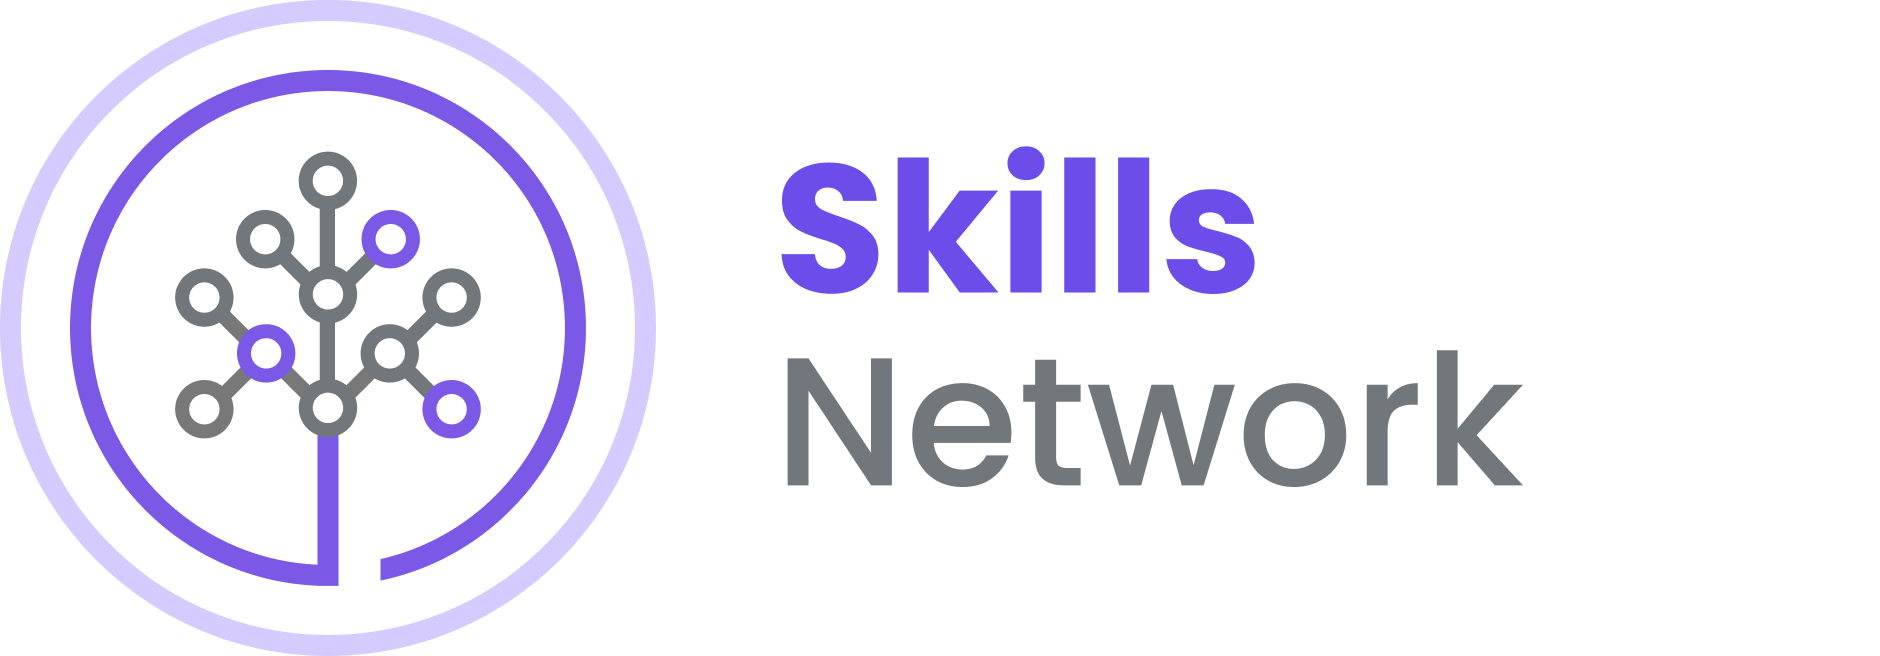

In [36]:
Image.open(path)

## **Obtenir une request avec des paramètres d'URL**

Vous pouvez utiliser la méthode <b>GET</b> pour modifier les résultats de votre requête, par exemple pour récupérer des données à partir d'une API. Nous envoyons une requête <b>GET</b> au serveur. Comme avant, nous avons l'<b>URL de base</b>, dans la <b>Route</b>, nous ajoutons <code>/get</code>, ce qui indique que nous souhaitons effectuer une requête <code>GET</code>.

L'URL de base est pour <code>[http://httpbin.org/](http://httpbin.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)</code> est un simple service de requête et de réponse HTTP. L'<code>URL</code> en Python est donnée par :

In [37]:
url_get='http://httpbin.org/get'

Une <a href="https://en.wikipedia.org/wiki/Query_string?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">chaîne de requête</a> fait partie d'un localisateur de ressources uniforme (URL), qui envoie d'autres informations au serveur Web. Le début de la requête est un <code>?</code>, suivi d'une série de paires paramètre/valeur, comme indiqué dans le tableau ci-dessous. Le premier nom du paramètre est <code>name</code> et la valeur est <code>Joseph</code>. Le nom du deuxième paramètre est <code>ID</code> et la valeur est <code>123</code>. Chaque paire, paramètre et valeur est séparée par un signe égal, <code>=</code>.
La série de paires est séparée par l'esperluette <code>&</code>.

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/query_string.png" width="500" align="center">
</div>


Pour créer une chaîne de requête, ajoutez un dictionnaire. Les clés sont les noms des paramètres et les valeurs sont la valeur de la chaîne de requête.

In [38]:
payload={"name":"Joseph","ID":"123"}

Ensuite, en passant le dictionnaire <code>payload</code> au paramètre <code>params</code> de la fonction <code>get()</code> :

In [39]:
r=requests.get(url_get,params=payload)

Nous pouvons imprimer l'<code>URL</code> et voir le nom et les valeurs.

In [40]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

Il n'y a pas de corps de requête.

In [41]:
print("request body:", r.request.body)

request body: None


Nous pouvons imprimer le code d'état.

In [42]:
print(r.status_code)

200


Nous pouvons voir la réponse sous forme de texte :

In [43]:
print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-66cb4095-4feb79727dbf40fd219654a0"
  }, 
  "origin": "46.193.4.162", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



Nous pouvons regarder le <code>'Content-Type'</code>.

In [44]:
r.headers['Content-Type']

'application/json'

Comme le contenu <code>'Content-Type'</code> est au format <code>JSON</code> nous pouvons utiliser la méthode <code>json()</code>, elle renvoie un <code>dict</code> Python :

In [45]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-66cb4095-4feb79727dbf40fd219654a0'},
 'origin': '46.193.4.162',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

La clé <code>args</code> a le nom et les valeurs :

In [46]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

### **Post Requests ou Demandes de publication**

Comme une requête GET, une requête POST est utilisée pour envoyer des données à un serveur, mais la requête POST envoie les données dans un corps de requête. Pour envoyer la requête POST en Python, dans l'URL, nous modifions la route vers POST :

In [47]:
url_post='http://httpbin.org/post'

Ce point de terminaison attendra des données sous forme de fichier ou de formulaire. Un formulaire est un moyen pratique de configurer une requête HTTP pour envoyer des données à un serveur.

Pour faire une requête <code>POST</code> on utilise la fonction <code>post()</code>, la variable <code>payload</code> est passée au paramètre <code>data </code>:

In [48]:
r_post=requests.post(url_post,data=payload)

En comparant l'URL de l'objet de réponse de la requête <code>GET</code> et <code>POST</code>, nous voyons que la requête <code>POST</code> n'a pas de paires nom ou valeur.

In [49]:
print("POST request URL:",r_post.url )
print("GET request URL:",r.url)

POST request URL: http://httpbin.org/post
GET request URL: http://httpbin.org/get?name=Joseph&ID=123


Nous pouvons comparer le corps de la requête POST et GET, nous voyons que seule la requête POST a un corps :

In [50]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

POST request body: name=Joseph&ID=123
GET request body: None


Nous pouvons également visualiser le formulaire :

In [51]:
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}

Vous pouvez faire bien d'autres choses. Consultez <a href="https://requests.readthedocs.io/en/master/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">Requêtes</a> pour en savoir plus.

#  Exemples d'API Random User et Fruityvice

Comme vous l'avez déjà appris dans les vidéos et les blocs-notes précédents, API signifie Application Programming Interface et est un intermédiaire logiciel qui permet à deux applications de communiquer entre elles.

Les avantages de l'utilisation des API :
* **Automatisation**. Moins d'efforts humains sont nécessaires et les flux de travail peuvent être facilement mis à jour pour devenir plus rapides et plus productifs.

* **Efficacité**. Cela permet d'utiliser les capacités de l'une des API déjà développées plutôt que d'essayer d'implémenter indépendamment certaines fonctionnalités à partir de zéro.

L'inconvénient de l'utilisation des API :
* **Sécurité**. Si l'API est mal intégrée, cela signifie qu'elle sera vulnérable aux attaques, ce qui entraînera des violations de données ou des pertes ayant des implications financières ou de réputation.

L'une des applications que nous utiliserons dans ce bloc-notes est Random User Generator. RandomUser est une API open source gratuite qui fournit aux développeurs des utilisateurs générés aléatoirement à utiliser comme espaces réservés à des fins de test.

Cela rend l'outil similaire au Lorem Ipsum, mais il s'agit d'un espace réservé pour les personnes au lieu du texte. L'API peut renvoyer plusieurs résultats, ainsi que spécifier les détails générés par l'utilisateur tels que le sexe, l'e-mail, l'image, le nom d'utilisateur, l'adresse, le titre, le prénom et le nom, etc. Vous trouverez plus d'informations sur [RandomUser](https://randomuser.me/documentation#intro) ici.

Un autre exemple d'API simple que nous utiliserons est l'application Fruityvice. Le service Web de l'API Fruityvice qui fournit des données pour toutes sortes de fruits ! Vous pouvez utiliser Fruityvice pour découvrir des informations intéressantes sur les fruits et vous informer. Le service Web est entièrement gratuit.

## Exemple 1 : API RandomUser
Vous trouverez ci-dessous les paramètres Get Methods que nous pouvons générer. Pour plus d'informations sur les paramètres, veuillez consulter cette page [documentation](https://randomuser.me/documentation).

#### **Get Methods**


- get_cell()
- get_city()
- get_dob()
- get_email()
- get_first_name()
- get_full_name()
- get_gender()
- get_id()
- get_id_number()
- get_id_type()
- get_info()
- get_last_name()
- get_login_md5()
- get_login_salt()
- get_login_sha1()
- get_login_sha256()
- get_nat()
- get_password()
- get_phone()
- get_picture()
- get_postcode()
- get_registered()
- get_state()
- get_street()
- get_username()
- get_zipcode()

Pour commencer à utiliser l'API, vous pouvez installer la bibliothèque `randomuser` en exécutant la commande `pip install`.

In [52]:
! pip install randomuser

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5089 sha256=dfddd15f3c39b0ea63452bb25a991644a89e51268419372318c5c945c16d7dd9
  Stored in directory: c:\users\adjeg\appdata\local\pip\cache\wheels\be\62\c8\71e1b48f4758ea5b78af7595d87178f628cde315a3326610ee
Successfully built randomuser



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Ensuite, nous chargerons les bibliothèques nécessaires.

In [53]:
from randomuser import RandomUser
import pandas as pd

ModuleNotFoundError: No module named 'randomuser'

Premièrement nous devons créer l'objet random, r

In [4]:
r = RandomUser()

Ensuite, en utilisant la fonction `generate_users()`, nous obtenons une liste de 10 utilisateurs aléatoires.

In [6]:
list = r.generate_users(10)

In [7]:
list

Les fonctions « Get Methods » mentionnées au début de ce bloc-notes peuvent générer les paramètres nécessaires à la construction d'un jeu de données. Par exemple, pour obtenir le nom complet, nous appelons la fonction « get_full_name() ».

In [8]:
name = r.get_full_name()

Supposons que nous n'ayons besoin que de 10 utilisateurs avec leurs noms complets, leurs adresses e-mail et leurs Etat. Nous pouvons écrire une « boucle for » pour imprimer ces 10 utilisateurs.

In [10]:
for user in list:
  print(user.get_full_name(), "", user.get_email(), "", user.get_state())

Frank Henderson  frank.henderson@example.com  North Carolina
Amanda Aro  amanda.aro@example.com  Lapland
Jonas Olsen  jonas.olsen@example.com  Hovedstaden
Loïc Carpentier  loic.carpentier@example.com  Appenzell Innerrhoden
Emilia Hanka  emilia.hanka@example.com  Kymenlaakso
Afşar Babacan  afsar.babacan@example.com  Adana
Barbara Pfaff  barbara.pfaff@example.com  Saarland
Michael Ferguson  michael.ferguson@example.com  County Fermanagh
Angelika Vartdal  angelika.vartdal@example.com  Møre og Romsdal
Nicoline Mortensen  nicoline.mortensen@example.com  Sjælland


**Exemple :** Générez des photos de 10 utilisateurs aléatoires.

In [13]:
for user in list:
  print(user.get_picture)

<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea8c157ee0>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db47dc0>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db46830>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db46e90>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db47ee0>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db46fb0>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db477f0>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db47190>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db471f0>>
<bound method RandomUser.get_picture of <randomuser.RandomUser object at 0x7bea6db45f60>>


Pour générer un tableau avec des informations sur les utilisateurs, nous pouvons écrire une fonction contenant tous les paramètres souhaités. Par exemple, le nom, le sexe, la ville, etc. Les paramètres dépendront des exigences du test à effectuer. Nous appelons les méthodes Get, répertoriées au début de ce bloc-notes. Ensuite, nous renvoyons le dataframe pandas avec les utilisateurs.

In [14]:
def get_users():
    users =[]

    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})

    return pd.DataFrame(users)

In [15]:
get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Natanael Martins,male,Blumenau,Minas Gerais,natanael.martins@example.com,1997-03-05T01:56:57.592Z,https://randomuser.me/api/portraits/men/34.jpg
1,Niete Caldeira,male,Poá,Rio Grande do Sul,niete.caldeira@example.com,1991-11-28T15:19:56.991Z,https://randomuser.me/api/portraits/men/49.jpg
2,Lily Hudson,female,Glendale,Kentucky,lily.hudson@example.com,1983-05-11T03:22:35.745Z,https://randomuser.me/api/portraits/women/45.jpg
3,Lucas Fox,male,Leeds,South Glamorgan,lucas.fox@example.com,1964-03-03T23:40:01.446Z,https://randomuser.me/api/portraits/men/33.jpg
4,Willow Williams,female,Greymouth,Nelson,willow.williams@example.com,1966-09-25T18:58:25.981Z,https://randomuser.me/api/portraits/women/14.jpg
5,Julie Myers,female,Ballarat,Western Australia,julie.myers@example.com,1994-06-23T12:20:55.318Z,https://randomuser.me/api/portraits/women/5.jpg
6,Olindo Rocha,male,Olinda,Roraima,olindo.rocha@example.com,1954-05-29T01:14:11.283Z,https://randomuser.me/api/portraits/men/13.jpg
7,Nalmir Carvalho,female,Três Lagoas,Bahia,nalmir.carvalho@example.com,1963-01-24T14:18:59.563Z,https://randomuser.me/api/portraits/women/12.jpg
8,Ashton Jones,male,Hamilton,Gisborne,ashton.jones@example.com,1947-02-16T20:26:38.801Z,https://randomuser.me/api/portraits/men/4.jpg
9,Nenad Adam,male,Inkwil,Solothurn,nenad.adam@example.com,1956-04-29T12:18:00.904Z,https://randomuser.me/api/portraits/men/14.jpg


In [16]:
df1 = pd.DataFrame(get_users())

## Exemple 2 : API Fruityvice

Une autre façon plus courante d'utiliser les API consiste à utiliser la bibliothèque « requests ».
Nous commencerons par importer toutes les bibliothèques requises.

In [17]:
import requests
import json

Nous obtiendrons les données de l'API [fruityvice](https://www.fruityvice.com) à l'aide de la fonction `requests.get("url")`. Les données sont au format json.

In [18]:
data = requests.get("https://fruityvice.com/api/fruit/all")

Nous récupérerons les résultats en utilisant la fonction `json.loads()`.

In [19]:
results = json.loads(data.text)

Nous convertirons vos données json en dataframe *pandas*.

In [21]:
pd.DataFrame(results).head()

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."


Le résultat est dans un format json imbriqué. La colonne « nutrition » contient plusieurs sous-colonnes, les données doivent donc être « aplaties » ou normalisées.

In [24]:
df2 = pd.json_normalize(results)
df2.tail()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
44,Pumpkin,100,Cucurbitaceae,Cucurbitales,Cucurbita,25,0.30,3.3,4.6,1.1
45,Japanese Persimmon,101,Ebenaceae,Ericales,Diospyros,70,0.20,13.0,19.0,0.6
46,Papaya,42,Caricaceae,Brassicales,Carica,39,0.30,4.4,5.8,0.5
47,Annona,103,Annonaceae,Rosales,Annonas,92,0.29,3.4,19.1,1.5
48,Ceylon Gooseberry,104,Salicaceae,Malpighiales,Dovyalis,47,0.30,8.1,9.6,1.2


Voyons si nous pouvons extraire des informations de ce dataframe. Peut-être avons-nous besoin de connaître la famille et le genre d'une cerise.

In [25]:
cherry = df2.loc[df2["name"] == "Cherry"]
(cherry.iloc[0]['family']), (cherry.iloc[0]['genus'])

('Rosaceae', 'Prunus')

**Exemple :** découvrez combien de calories contiennent une banane.


In [28]:
banane = df2.loc[df2["name"] == "Banana"]
(banane.iloc[0]['nutritions.calories'])

96

## Exemple 3

Cette [page](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/) contient une liste d'API publiques gratuites pour vous permettre de vous entraîner. Prenons l'exemple suivant.

#### API officielle des blagues
Cette API renvoie des blagues aléatoires à partir d'une base de données. L'URL suivante peut être utilisée pour récupérer 10 blagues aléatoires.

https://official-joke-api.appspot.com/jokes/ten

1. À l'aide de la fonction `requests.get("url")`, chargez les données à partir de l'URL.

In [39]:
data2 = requests.get("https://official-joke-api.appspot.com/jokes/ten")

2. Récupérez les résultats à l'aide de la fonction `json.loads()`.

In [43]:
df = json.loads(data2.text)
df

[{'type': 'general',
  'setup': 'What kind of tree fits in your hand?',
  'punchline': 'A palm tree!',
  'id': 257},
 {'type': 'general',
  'setup': 'What do you call an elephant that doesn’t matter?',
  'punchline': 'An irrelephant.',
  'id': 220},
 {'type': 'general',
  'setup': 'What did celery say when he broke up with his girlfriend?',
  'punchline': "She wasn't right for me, so I really don't carrot all.",
  'id': 158},
 {'type': 'general',
  'setup': 'What do you call a laughing motorcycle?',
  'punchline': 'A Yamahahahaha.',
  'id': 20},
 {'type': 'general',
  'setup': 'Did you hear about the cheese factory that exploded in France?',
  'punchline': 'There was nothing left but de Brie.',
  'id': 86},
 {'type': 'general',
  'setup': 'Why does a chicken coop only have two doors?',
  'punchline': 'Because if it had four doors it would be a chicken sedan.',
  'id': 356},
 {'type': 'programming',
  'setup': 'What did the router say to the doctor?',
  'punchline': 'It hurts when IP.',

3. Convertissez les données JSON en dataframe *pandas*. Supprimez les colonnes type et id.

In [45]:
data = pd.json_normalize(df)
data.head()


,type,setup,punchline,id
0,general,What kind of tree fits in your hand?,A palm tree!,257
1,general,What do you call an elephant that doesn’t matter?,An irrelephant.,220
2,general,What did celery say when he broke up with his ...,"She wasn't right for me, so I really don't car...",158
3,general,What do you call a laughing motorcycle?,A Yamahahahaha.,20
4,general,Did you hear about the cheese factory that exp...,There was nothing left but de Brie.,86


In [46]:
data.drop(['type', 'id'], axis = 1, inplace = True)

data.head()

,setup,punchline
0,What kind of tree fits in your hand?,A palm tree!
1,What do you call an elephant that doesn’t matter?,An irrelephant.
2,What did celery say when he broke up with his ...,"She wasn't right for me, so I really don't car..."
3,What do you call a laughing motorcycle?,A Yamahahahaha.
4,Did you hear about the cheese factory that exp...,There was nothing left but de Brie.


# **WEB SCRAPING**

Les bibliothèques nécessaires :

In [1]:
!pip install requests
!pip install bs4

Importer les modules et fonctions requis

In [2]:
from bs4 import BeautifulSoup # cette module aide pour le web scraping
import requests # Cette module ppermet de télécharger la page wweb

###**Objet Beautiful Soup**

Beautiful Soup est une bibliothèque Python permettant d'extraire des données à partir de fichiers HTML et XML. Nous nous concentrerons sur les fichiers HTML. Cela se fait en représentant le HTML sous la forme d'un ensemble d'objets avec des méthodes utilisées pour analyser le HTML. Nous pouvons parcourir le HTML sous la forme d'une arborescence et/ou filtrer ce que nous recherchons.

Considérez le HTML suivant :

In [3]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

Nous pouvons le stocker sous forme de chaîne dans la variable HTML :

In [4]:
html = "<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3> \
<b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p> \
<h3>Stephen Curry</h3><p> Salary: $85,000,000</p> \
<h3>Kevin Durant</h3><p> Salary: $73,200,000</p></body></html>"

Pour analyser un document, transmettez-le au constructeur <code>BeautifulSoup</code>. L'objet <code>BeautifulSoup</code> représente le document sous la forme d'une structure de données imbriquée :

In [5]:
soup = BeautifulSoup(html, 'html5lib')

Tout d'abord, le document est converti en Unicode (similaire à ASCII) et les entités HTML sont converties en caractères Unicode. Beautiful Soup transforme un document HTML complexe en une arborescence complexe d'objets Python. L'objet <code>BeautifulSoup</code> peut créer d'autres types d'objets. Enfin, nous examinerons les objets <code>NavigableString</code>.

Nous pouvons utiliser la méthode <code>prettify()</code> pour afficher le HTML dans la structure imbriquée :

In [6]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html><head><title>Page Title</title></head><body><h3> <b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p> <h3>Stephen Curry</h3><p> Salary: $85,000,000</p> <h3>Kevin Durant</h3><p> Salary: $73,200,000</p></body></html>>


###**Tags**


Supposons que nous souhaitons le titre de la page et le nom du joueur le mieux payé. Nous pouvons utiliser l'objet <code>Tag</code>. L'objet <code>Tag</code> correspond à une balise HTML dans le document d'origine, par exemple la balise title.

In [8]:
tag_object = soup.title
print("tag_object: ", tag_object)

tag_object:  <title>Page Title</title>


Nous pouvons voir le type de balise <code>bs4.element.Tag</code>

In [9]:
print("tag objet type:", type(tag_object))

tag objet type: <class 'bs4.element.Tag'>


S'il existe plusieurs <code>Tag</code> portant le même nom, le premier élément portant ce nom de <code>Tag</code> est appelé. Cela correspond au joueur le mieux payé :

In [11]:
tag_objet = soup.h3
tag_objet

<h3> <b id="boldest">Lebron James</b></h3>

Entouré par l'attribut gras <code>b</code>, il permet d'utiliser la représentation arborescente. Nous pouvons naviguer dans l'arbre en utilisant l'attribut child pour obtenir le nom.

####**Children, Parents, and Siblings (Enfants, parents et frères et sœurs)**

Comme indiqué ci-dessus, l'objet <code>Tag</code> est un arbre d'objets. Nous pouvons accéder à l'enfant de la balise ou naviguer dans la branche comme suit :

In [12]:
tag_enfant = tag_objet.b
tag_enfant

<b id="boldest">Lebron James</b>

Vous pouvez accéder au parent avec le <code>parent</code>.

In [13]:
tag_parent = tag_objet.parent
tag_parent

<body><h3> <b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p> <h3>Stephen Curry</h3><p> Salary: $85,000,000</p> <h3>Kevin Durant</h3><p> Salary: $73,200,000</p></body>

Ceci est identique à :

In [21]:
tag_objet

<h3> <b id="boldest">Lebron James</b></h3>

Le parent de <code>tag_objet</code> est l'élément <code>body</code>.

In [22]:
tag_objet.parent

<body><h3> <b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p> <h3>Stephen Curry</h3><p> Salary: $85,000,000</p> <h3>Kevin Durant</h3><p> Salary: $73,200,000</p></body>

<code>tag_object</code> sibling est l'élément <code>paragraph</code>.

In [23]:
sibling_1 = tag_objet.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

`sibling_2` est l'élément `header`, qui est également un frère de `sibling_1` et de `tag_object`

In [24]:
sibling_2 = sibling_1.next_sibling
sibling_2

' '

Use the object <code>sibling\_2</code> and the method <code>next_sibling</code> to find the salary of Stephen Curry:

In [25]:
sibling_2.next_sibling

<h3>Stephen Curry</h3>

#### **Attributs HTML**

Si la balise possède des attributs, la balise <code>id="boldest"</code> possède un attribut <code>id</code> dont la valeur est <code>boldest</code>. Vous pouvez accéder aux attributs d'une balise en traitant la balise comme un dictionnaire :

In [27]:
tag_enfant['id']

'boldest'

Vous pouvez accéder directement à ce dictionnaire sous la forme <code>attrs</code> :

In [28]:
tag_enfant.attrs

{'id': 'boldest'}

Nous pouvons également obtenir le contenu de l'attribut de la <code>tag</code> en utilisant la méthode Python <code>get()</code>.

In [29]:
tag_enfant.get('id')

'boldest'

####**Navigable String (ou Chaîne navigable)**

Une chaîne correspond à un morceau de texte ou de contenu au sein d'une balise. Beautiful Soup utilise la classe <code>NavigableString</code> pour contenir ce texte. Dans notre HTML, nous pouvons obtenir le nom du premier joueur en extrayant la chaîne de l'objet <code>Tag</code> <code>tag_child</code> comme suit :

In [30]:
tag_string = tag_enfant.string
tag_string

'Lebron James'

Nous pouvons vérifier le type d'objet en faisant :

In [31]:
type(tag_string)

bs4.element.NavigableString

Une NavigableString est similaire à une chaîne Python ou à une chaîne Unicode. Pour être plus précis, la principale différence est qu'elle prend également en charge certaines fonctionnalités de <code>BeautifulSoup</code>. Nous pouvons la convertir en objet chaîne en Python :

In [32]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

###**Filtrer**

Les filtres vous permettent de trouver des modèles complexes, le filtre le plus simple étant une chaîne. Dans cette section, nous allons passer une chaîne à une méthode de filtrage différente et Beautiful Soup effectuera une correspondance avec cette chaîne exacte. Considérez le code HTML suivant des lancements de fusées :


In [33]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
   </tr>
  <tr>
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


Nous pouvons le stocker sous forme de chaîne dans la variable <code>table</code> :

In [34]:
table = "<table><tr><td id='flight'>Flight No</td><td>Launch site</td> \
<td>Payload mass</td></tr><tr> <td>1</td> \
<td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td> \
<td>300 kg</td></tr><tr><td>2</td> \
<td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td> \
<td>94 kg</td></tr><tr><td>3</td> \
<td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td> \
<td>80 kg</td></tr></table>"

In [35]:
table_bs = BeautifulSoup(table, 'html5lib')

####**Trouver tout**

La méthode <code>find_all()</code> examine les descendants d'une balise et récupère tous les descendants qui correspondent à vos filtres.

<p>
La signature de la méthode pour <code>find_all(name, attrs, recursive, string, limit, **kwargs)<c/ode>
</p>

#####**Nom**

Lorsque nous définissons le paramètre <code>name</code> sur un nom de balise, la méthode extraira toutes les balises portant ce nom et ses enfants.

In [36]:
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td> <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td> <td>300 kg</td></tr>,
 <tr><td>2</td> <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td> <td>94 kg</td></tr>,
 <tr><td>3</td> <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td> <td>80 kg</td></tr>]

In [37]:
first_row = table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [38]:
first_row.td

<td id="flight">Flight No</td>

Si nous parcourons la liste, chaque élément correspond à une ligne du tableau :

In [39]:
for i, row in enumerate(table_rows):
    print("row", i, "is", row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td> <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td> <td>300 kg</td></tr>
row 2 is <tr><td>2</td> <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td> <td>94 kg</td></tr>
row 3 is <tr><td>3</td> <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td> <td>80 kg</td></tr>


Comme <code>row</code> est un objet <code>cell</code>, nous pouvons lui appliquer la méthode <code>find_all</code> et extraire les cellules du tableau dans l'objet <code>cells</code> en utilisant la balise <code>td</code>, ce sont tous les enfants portant le nom <code>td</code>. Le résultat est une liste, chaque élément correspond à une cellule et est un objet <code>Tag</code>, nous pouvons également parcourir cette liste. Nous pouvons extraire le contenu en utilisant l'attribut <code>string</code>.

In [40]:
for i, row in enumerate(table_rows):
    print("row", i)
    cells = row.find_all('td')
    for j, cell in enumerate(cells):
        print('colunm', j, "cell", cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>
colunm 2 cell <td>80 kg</td>


Si nous utilisons une liste, nous pouvons établir une correspondance avec n’importe quel élément de cette liste.

In [41]:
list_input = table_bs.find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td> <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td> <td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td> <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td> <td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td> <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td> <td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>,
 <td>80 kg</td>]

####**Attributs**